# Plot the wind speed from ECMWF model

In [4]:
import sys
sys.path.insert(0, '..')
import datetime
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from filament import filament
import logging
import netCDF4
import cmocean
import copy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.feature as cf
coast = cf.GSHHSFeature(scale='f')
myproj = ccrs.PlateCarree()
coast = cfeature.GSHHSFeature(scale="f")
from importlib import reload
reload(filament)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.style.use("./filament.mplstyle")

In [5]:
datafile = "/home/ctroupin/data/Wind/monthly_wind_ecmwf.nc"

In [6]:
with netCDF4.Dataset(datafile) as ds:
    print(ds)
    lon = ds.get_variables_by_attributes(long_name="longitude")[0][:]
    lat = np.sort(ds.get_variables_by_attributes(long_name="latitude")[0][:])
    uwind = ds.variables["u10"][:]
    vwind = ds.variables["v10"][:]
    time = ds.get_variables_by_attributes(long_name="time")[0]
    dates = netCDF4.num2date(time[:], time.units, only_use_cftime_datetimes=False, only_use_python_datetimes=True)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2023-06-28 07:55:10 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data6/adaptor.mars.internal-1687938904.9226432-32074-17-43dee740-872b-405b-afa4-bcf2c36100bd.nc /cache/tmp/43dee740-872b-405b-afa4-bcf2c36100bd-adaptor.mars.internal-1687938575.7098186-32074-28-tmp.grib
    dimensions(sizes): longitude(241), latitude(241), expver(2), time(1001)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 expver(expver), int32 time(time), int16 u10(time, expver, latitude, longitude), int16 v10(time, expver, latitude, longitude)
    groups: 


In [7]:
speed = np.sqrt(uwind * uwind + vwind * vwind)
speed.shape

/tmp/ipykernel_73644/214917610.py:1: RuntimeWarning: invalid value encountered in sqrt
  speed = np.sqrt(uwind * uwind + vwind * vwind)


(1001, 2, 241, 241)

In [8]:
speed_avg = np.mean(np.mean(speed[:,0,:,:], axis=2), axis=1)
speed_avg.shape

(1001,)

In [9]:
gooddates = np.where(dates >= datetime.datetime(2023, 1, 1))[0]
gooddates

array([ 996,  997,  998,  999, 1000])

2023-01-01 00:00:00 4.879798141424232
2023-02-01 00:00:00 4.938295642925006
2023-03-01 00:00:00 4.803945795950452
2023-04-01 00:00:00 --
2023-05-01 00:00:00 --


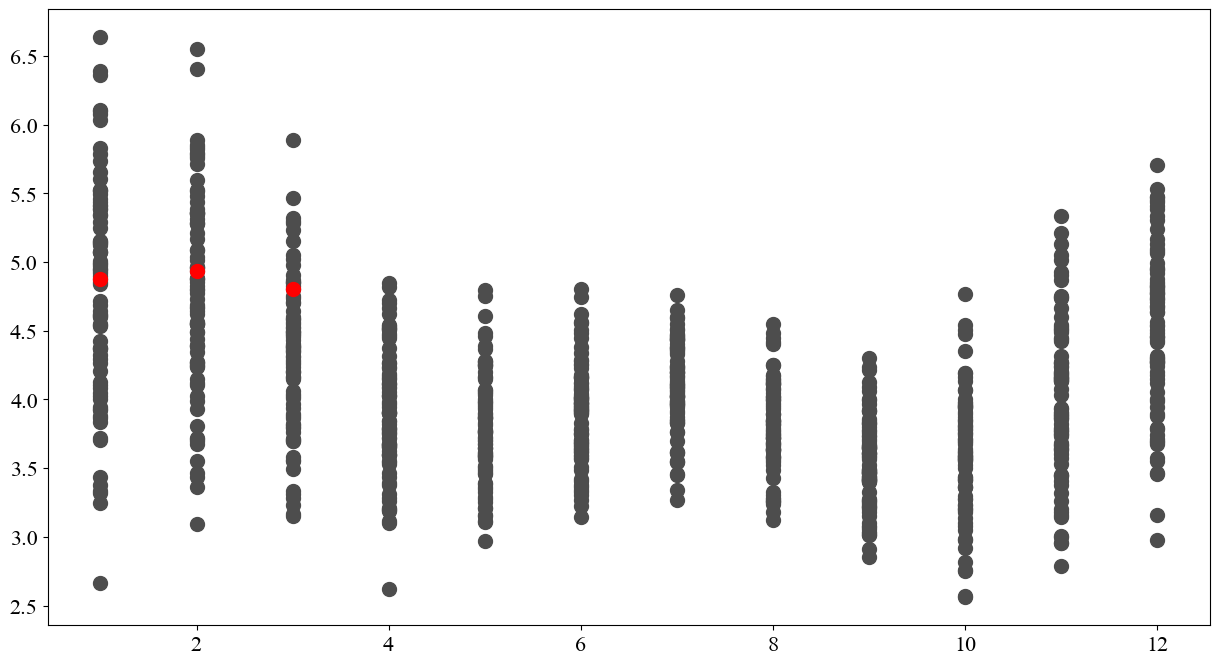

In [26]:
fig = plt.figure(figsize=(15, 8))
ax = plt.subplot(111)
for dd, spd in zip(dates, speed_avg):
    ax.plot(dd.month, spd, "o", color=".3")
for ii in gooddates:
    print(dates[ii], speed_avg[ii])
    ax.plot(dates[ii].month, speed_avg[ii], "ro", zorder=4)
plt.show()

(10957.0, 20935.75)

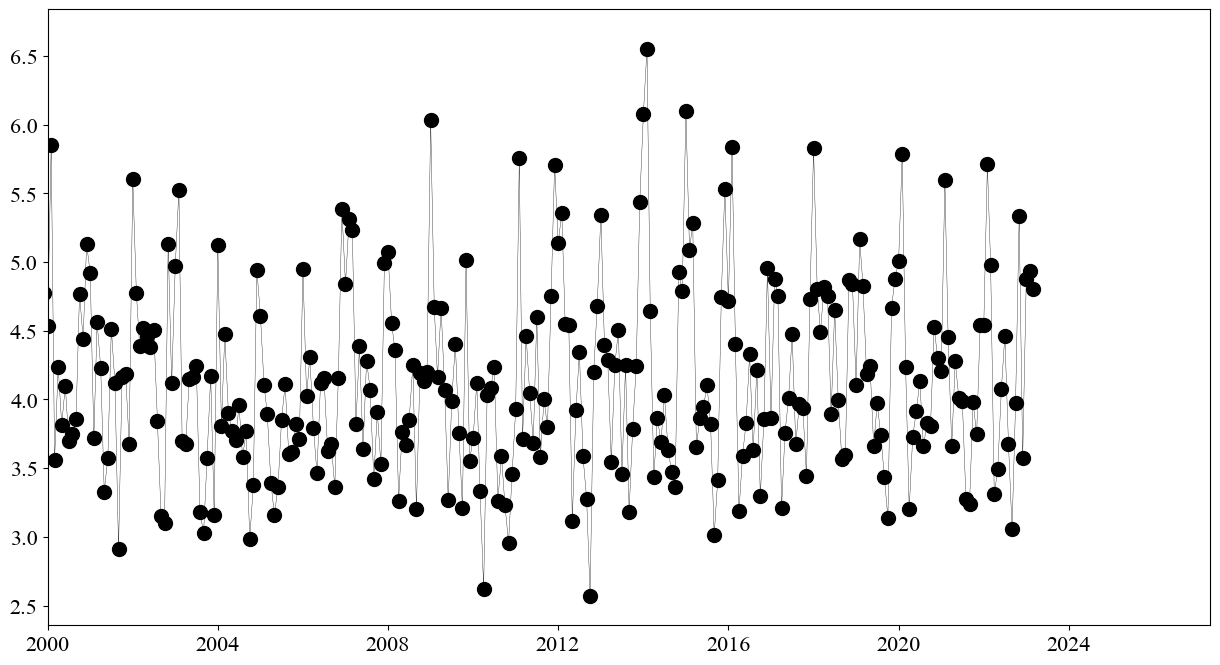

In [13]:
fig = plt.figure(figsize=(15, 8))
ax = plt.subplot(111)
ax.plot(dates, speed_avg, "ko-", lw=.25)
ax.set_xlim(datetime.date(2000, 1, 1), )

In [10]:
figdir = "/home/ctroupin/data/Wind/figures/animation01"

In [12]:
for iii in range(888, len(dates)):
    fig = plt.figure(figsize=(15, 8))
    ax = plt.subplot(111, projection=ccrs.PlateCarree())
    quiv = ax.quiver(lon, lat, np.flipud(uwind[iii,0,:,:]), np.flipud(vwind[iii,0,:,:]), np.flipud(speed[iii,0,:,:]),
              scale=250, width=0.0015, cmap=cmocean.cm.speed, clim=([0, 10]))
    
    fig_coord = [0.55,0.2,0.15,0.02]
    cbar_ax = fig.add_axes(fig_coord)
    cb = plt.colorbar(quiv, cax=cbar_ax, orientation='horizontal', extend="max")
    cb.set_ticklabels(["0", "5", "10 m/s"])
    tt = ax.text(0.01, 0.99, dates[iii].strftime("%Y-%m-%d"), ha="left", va="top", transform = ax.transAxes,
           fontsize=24)
    tt.set_bbox(dict(facecolor='.95', alpha=0.85, edgecolor='.8'))
    ax.set_extent([-20, -10., 25, 35])
    ax.coastlines(color=".2", lw=.25)
    ax.add_feature(cfeature.LAND, zorder=2, color=".35", alpha=.7)
    
    fname = f"wind_ecmwf_{str(iii).zfill(4)}"
    plt.savefig(os.path.join(figdir, fname))
    plt.close("all")

/tmp/ipykernel_73644/2437139612.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(["0", "5", "10 m/s"])
/tmp/ipykernel_73644/2437139612.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(["0", "5", "10 m/s"])
/tmp/ipykernel_73644/2437139612.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(["0", "5", "10 m/s"])
/tmp/ipykernel_73644/2437139612.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(["0", "5", "10 m/s"])
/tmp/ipykernel_73644/2437139612.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(["0", "5", "10 m/s"])
/tmp/ipykernel_73644/2437139612.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(["0", "5", "10 m/s"])
/tmp/ipykernel_73644/2437139612.py:10: UserWarning: FixedFormatt

/tmp/ipykernel_73644/2437139612.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(["0", "5", "10 m/s"])
/tmp/ipykernel_73644/2437139612.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(["0", "5", "10 m/s"])
/tmp/ipykernel_73644/2437139612.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(["0", "5", "10 m/s"])
/tmp/ipykernel_73644/2437139612.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(["0", "5", "10 m/s"])
/tmp/ipykernel_73644/2437139612.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(["0", "5", "10 m/s"])
/tmp/ipykernel_73644/2437139612.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(["0", "5", "10 m/s"])
/tmp/ipykernel_73644/2437139612.py:10: UserWarning: FixedFormatt

/tmp/ipykernel_73644/2437139612.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(["0", "5", "10 m/s"])
/tmp/ipykernel_73644/2437139612.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(["0", "5", "10 m/s"])
/tmp/ipykernel_73644/2437139612.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(["0", "5", "10 m/s"])
/tmp/ipykernel_73644/2437139612.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(["0", "5", "10 m/s"])
/tmp/ipykernel_73644/2437139612.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(["0", "5", "10 m/s"])
/tmp/ipykernel_73644/2437139612.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.set_ticklabels(["0", "5", "10 m/s"])
/tmp/ipykernel_73644/2437139612.py:10: UserWarning: FixedFormatt